In [1]:
import qp_tls_losses.qp_tls_functions as qpf
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, k
from scipy.special import k0
import math

In [11]:
n = 1
temps = np.linspace(0.01,0.3,101)
Q0 = 1e6
b1 = 0.5
D = 1
b2 = 0.5
f = np.mean(data_for_fr,axis=0)[0]
tc=1.2
Q_TLS = []
Q_QP = []
Q_tot = []
y1_val = []
y2_val = []
y3_val = []
T_QP = []
T_QP_1 = []
A0 = popt[0]
sat_temp = popt[1]
po = popt[2]
for T in temps:
    #Q_TLS.append(1/qpf.tls_loss(n, T, Q0, b1, b2, D, f))
    # y1_val.append(1/A0/np.exp(1.764*Tc/T))
    # y2_val.append(math.sinh(hbar*2*np.pi*f/2/k/T))
    # y3_val.append(k0(hbar*2*np.pi*f/2/k/T)*math.sinh(hbar*2*np.pi*f/2/k/T))
    T_QP.append(qpf.t_qp_t(T,sat_temp,po))
    Q_QP.append(1/qpf.qp_loss(T,A0,sat_temp,po,tc,f))
    #Q_tot.append(1/(qpf.tls_loss(n, T, Q0, b1, b2, D, f)+qpf.qp_loss(T,A0,sat_temp,po,tc,f)))

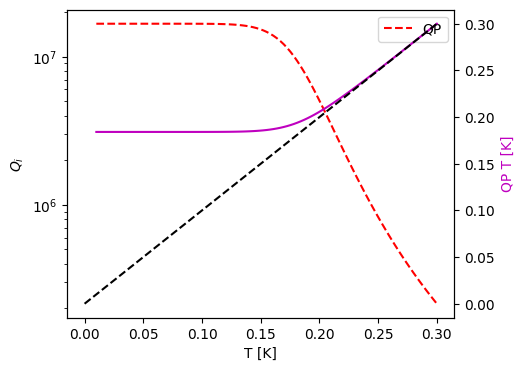

In [12]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# ax.plot(temps,Q_TLS,'--b',label='TLS')
ax.plot(temps,Q_QP,'--r',label='QP')
# ax.plot(temps,Q_tot,'-g',label='total')
# ax.plot(temps,y1_val)
# ax.plot(temps,y3_val)
ax1 = ax.twinx()
ax1.plot(temps,T_QP,'-m')
ax1.plot([0,0.3],[0,0.3],'--k')
ax1.set_ylabel('QP T [K]',color='m')
ax.legend()
ax.set_ylabel(r'$Q_i$')
ax.set_xlabel(r'T [K]')
ax.set_yscale('log')

In [3]:
import os
import re
import qp_tls_losses.res_analysis_CPW as resa
def natural_key(s):
    return [int(t) if t.isdigit() else t.lower()
            for t in re.split(r'(\d+)', s)]
data = {}
folder_path = r'G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data'
files = sorted(os.listdir(folder_path), key=natural_key)
for filename in files:
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as f:
            try:
                print(f'Processing: {file_path}')
                res_index, powers, fr, Qi, Qc, av_n, fr_err, Qi_err, Qc_err, R2, p_surf, p_MA, p_SA, p_MS = resa.read_data_from_hdf5_file(file_path)
                name_only = os.path.splitext(filename)[0]
                temperature = int(name_only.split("_")[-1].replace("mK", ""))
                data[filename] = {
                    'res_index': res_index,
                    'powers': powers,
                    'fr': fr,
                    'Qi' : Qi,
                    'Qc' : Qc,
                    'av_n' : av_n,
                    'fr_err' : fr_err,
                    'Qi_err' : Qi_err,
                    'Qc_err' : Qc_err,
                    'R2' : R2,
                    'temperature' : temperature,
                }
            except Exception as e:
                print(f' Error processing {file_path} : e')
data_for_Qi_graph = [data[fname]['Qi'] for fname in data]
data_for_fr = [np.mean(data[fname]['fr'],axis=1) for fname in data]
data_for_av_n = [data[fname]['av_n'] for fname in data]
#data_for_p_surf = [data[fname]['p_surf'] for fname in data]
data_for_qc_graph = [np.mean(data[fname]['Qc'],axis=1)  for fname in data]
labels = [key[:7] for key in data.keys()]
data_for_temperature= [data[fname]['temperature'] for fname in data]
data_for_powers = [data[fname]['powers'] for fname in data]

Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_30mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_50mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_75mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_100mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_125mK.hdf5
Processing: G:\Shared drives\MSDE

In [4]:
np.shape(data_for_Qi_graph)
data_for_temperature
# np.shape(data_for_av_n)

[30, 50, 75, 100, 125, 150, 175, 200]

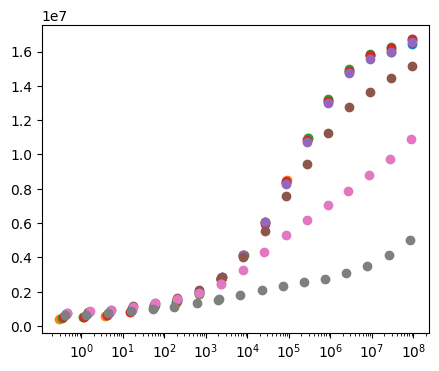

In [5]:
fig2,ax = plt.subplots(1,1,figsize=(5,4))
high_p_Qi = []
for ii,temp in enumerate(data_for_temperature):
    high_p_Qi.append(data_for_Qi_graph[ii][0][-1])
    ax.plot(data_for_av_n[ii][0],data_for_Qi_graph[ii][0],'o')
ax.set_xscale('log')
# ax.set_yscale('log')

In [28]:
def model_fit(x, a0, sat_temp,n):
    tc=1.2
    f=np.mean(data_for_fr,axis=0)[0]
    return 1/qpf.qp_loss(x,a0,sat_temp,n,tc,f)
    
from scipy.optimize import curve_fit

popt, pcov = curve_fit(
    model_fit,
    np.divide(data_for_temperature,1e3),
    high_p_Qi,
    p0=[1e2, 0.110, 5]   # initial guesses for a, c
)

temps_theor = np.linspace(0.01,0.3,101)
Q_QP_theor = [x for x in model_fit(temps,*popt)]

In [7]:
popt

array([84.22018969,  0.18411734, 11.53622053])

Text(0, 0.5, '$Q_i$')

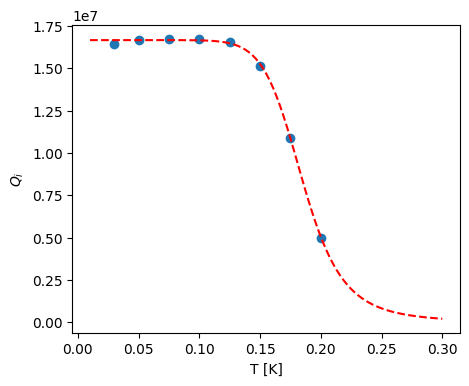

In [8]:
fig3,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(np.divide(data_for_temperature,1e3),high_p_Qi,'o')
ax.plot(temps_theor,Q_QP_theor,'--r',label='QP')
ax.set_xlabel('T [K]')
ax.set_ylabel(r'$Q_i$')

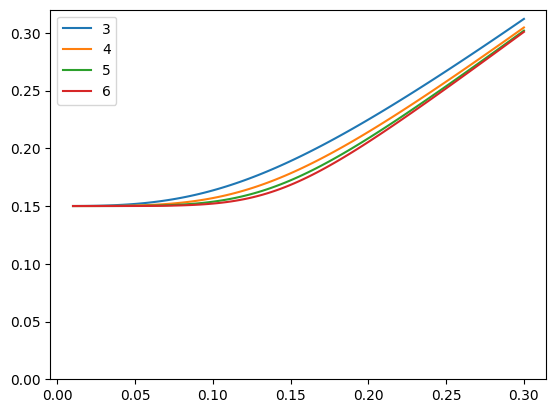

In [16]:
plt.plot(temps,T_QP[0],label='3')
plt.plot(temps,T_QP[1],label='4')
plt.plot(temps,T_QP[2],label='5')
plt.plot(temps,T_QP[3],label='6')
plt.ylim([0,0.32])
plt.legend()

In [11]:
n = [3,4,5,6]
T_QP = np.zeros((len(n),len(temps)))
for ii,val in enumerate(n):
    for jj,T in enumerate(temps):
        T_QP[ii][jj] = qpf.T_QP_T(T,sat_temp,val)

### TLS part

In [38]:
data_for_Qi_graph[0][0]
data_for_av_n[0][0]
T = np.divide(data_for_temperature,1e3)[0]
f = np.mean(data_for_fr,axis=0)[0]
tc=1.2
1/qpf.qp_loss(T,popt[0],popt[1],popt[2],tc,f)/1e6
nc_guess
1/qpf.tls_loss(1,T,data_for_Qi_graph[0][0][0],0.5,nc_guess,f)/1e6

np.float64(0.8341140332040471)

In [75]:
def total_model_fit(x,Q0,b2,nc):
    T = np.divide(data_for_temperature,1e3)[0]
    f = np.mean(data_for_fr,axis=0)[0]
    tc=1.2
    return 1/(qpf.tls_loss(x,T,Q0,b2,nc,f) + qpf.qp_loss(T,popt[0],popt[1],popt[2],tc,f))
idx = np.argmin(np.abs(data_for_Qi_graph[0][0] - data_for_Qi_graph[0][0][0]*np.sqrt(2)))
nc_guess = data_for_av_n[0][0][idx]
popt_total, pcov_total = curve_fit(total_model_fit, data_for_av_n[0][0], data_for_Qi_graph[0][0], p0 = [data_for_Qi_graph[0][0][0],0.5,nc_guess])

In [76]:
popt_tls

array([1.08562669e+06, 1.04114937e+00, 3.81564155e+02])

In [77]:
n_theor = np.logspace(0,8,101)
Q_theor = []
Q_tls_theor = []
Q_qp_theor = []
T = np.divide(data_for_temperature,1e3)[0]
f = np.mean(data_for_fr,axis=0)[0]
tc=1.2
for n in n_theor:
    Q_theor.append(1/(qpf.tls_loss(n,T,popt_tls[0],popt_tls[1],popt_tls[2],f)+qpf.qp_loss(T,popt[0],popt[1],popt[2],tc,f)))
    Q_tls_theor.append(1/qpf.tls_loss(n,T,popt_tls[0],popt_tls[1],popt_tls[2],f))
    Q_qp_theor.append(1/qpf.qp_loss(T,popt[0],popt[1],popt[2],tc,f))

idx = np.argmin(np.abs(Q_theor - Q_theor[0]*np.sqrt(2)))
x0 = n_theor[idx]

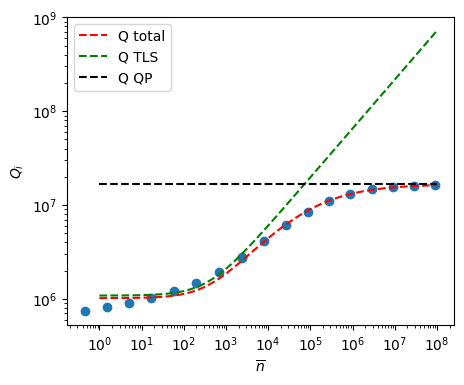

In [78]:
fig5,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(data_for_av_n[0][0],data_for_Qi_graph[0][0],'o')
plt.plot(n_theor,Q_theor,'--r',label='Q total')
plt.plot(n_theor,Q_tls_theor,'--g',label='Q TLS')
plt.plot(n_theor,Q_qp_theor,'--k',label='Q QP')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$Q_i$')
ax.set_xlabel(r'$\overline{n}$')
ax.legend()

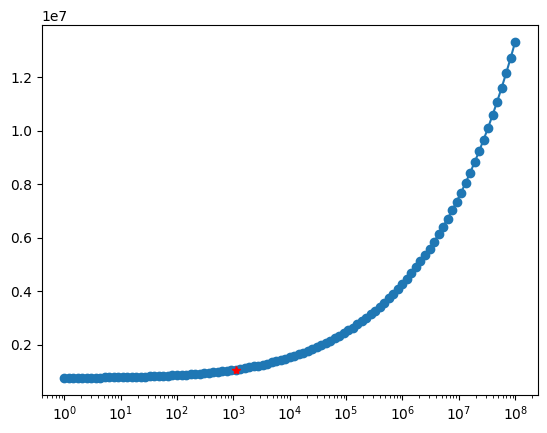

In [25]:
plt.plot(n_theor,Q_theor,'-o')
plt.plot(x0,Q_theor[idx],'r*')
plt.xscale('log')

### Total model

In [87]:
fit_values = []
n_theor = np.logspace(-1,8,101)
Q_total_theor = []
for ii,t in enumerate(np.divide(data_for_temperature,1e3)):
    def total_model_fit(x,Q0,b2,nc):
        f = np.mean(data_for_fr,axis=0)[0]
        tc=1.2
        return 1/(qpf.tls_loss(x,t,Q0,b2,nc,f) + qpf.qp_loss(t,popt[0],popt[1],popt[2],tc,f))
    idx = np.argmin(np.abs(data_for_Qi_graph[ii][0] - data_for_Qi_graph[ii][0][0]*np.sqrt(2)))
    nc_guess = data_for_av_n[ii][0][idx]
    popt_total, pcov_total = curve_fit(total_model_fit, data_for_av_n[ii][0], data_for_Qi_graph[ii][0], p0 = [data_for_Qi_graph[ii][0][0],0.5,nc_guess])
    fit_values.append(popt_total)
    Q_total_theor_n = []
    for n in n_theor:
        Q_total_theor_n.append(total_model_fit(n,*popt_total))
    Q_total_theor.append(Q_total_theor_n)

Text(0, 0.5, '$Q_i$')

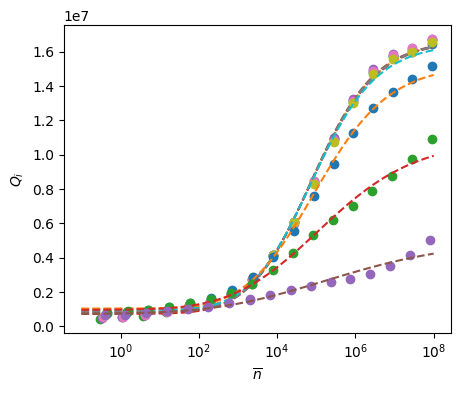

In [92]:
fig4,ax = plt.subplots(1,1,figsize=(5,4))
for ii,t in enumerate(np.divide(data_for_temperature,1e3)):
    ax.plot(data_for_av_n[ii][0],data_for_Qi_graph[ii][0],'o')
    ax.plot(n_theor,Q_total_theor[ii],'--')
ax.set_xscale('log')
ax.set_xlabel(r'$\overline{n}$')
ax.set_ylabel(r'$Q_i$')